In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold 
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [106]:
pd.set_option('display.max_columns', None)
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [107]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [108]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn.describe().T

count         mean          std    min     25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.000   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8500   118.75  
TotalCharges    3794.7375  8684.80

In [109]:
churn.isnull().sum().sort_values(ascending = False)/len(churn)*100

TotalCharges        0.156183
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [110]:
churn['TotalCharges'].fillna(value = churn['TotalCharges'].median(), inplace=True)
churn['TotalCharges'].isnull().sum()

0

In [111]:
converttoBinary={
    'Yes' : 1,
    'No' : 0,
    'No internet service' : 0,
    'No phone service' : 0
}

replaceFeatureVal = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn', 'OnlineSecurity', 
                    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replaceFeatureVal:
    churn[i] = churn[i].map(converttoBinary)

In [112]:
churn['MultipleLines'] = np.where(churn.MultipleLines == 'Yes', 1, 0)
churn['InternetDSL'] = np.where(churn.InternetService == 'DSL', 1, 0)
churn['InternetFiber'] = np.where(churn.InternetService == 'Fiber optic', 1, 0)
churn['Female'] = np.where(churn.gender == 'Female', 1, 0)
churn['OneYrContract'] = np.where(churn.Contract == 'One year', 1, 0)
churn['TwoYrContract'] = np.where(churn.Contract == 'Two year', 1, 0)

In [113]:
churn.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0             0              0             DSL               0             1   
1             1              0             DSL               1             0   
2             1              0             DSL               1             1   
3             0              0             DSL               1             0   
4             1              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  InternetDSL  InternetFiber  Female  \
0           29.85         29.85      0            1              0       1   
1           56.95       1889.50      0            1              0       0   
2           53.85        108.15      1            1              0       0   
3           42.30       1840.75      0            1              0       0   
4           70.70        151.65      1            0              1       1   

   OneYrContract  TwoYrContract  
0              0              0  
1              1              0  
2              0              0  
3              1              0  
4              0              0

In [114]:
x = churn.drop(['customerID','gender','InternetService','Contract','PaymentMethod','Churn'], axis = 1)
y = churn['Churn']

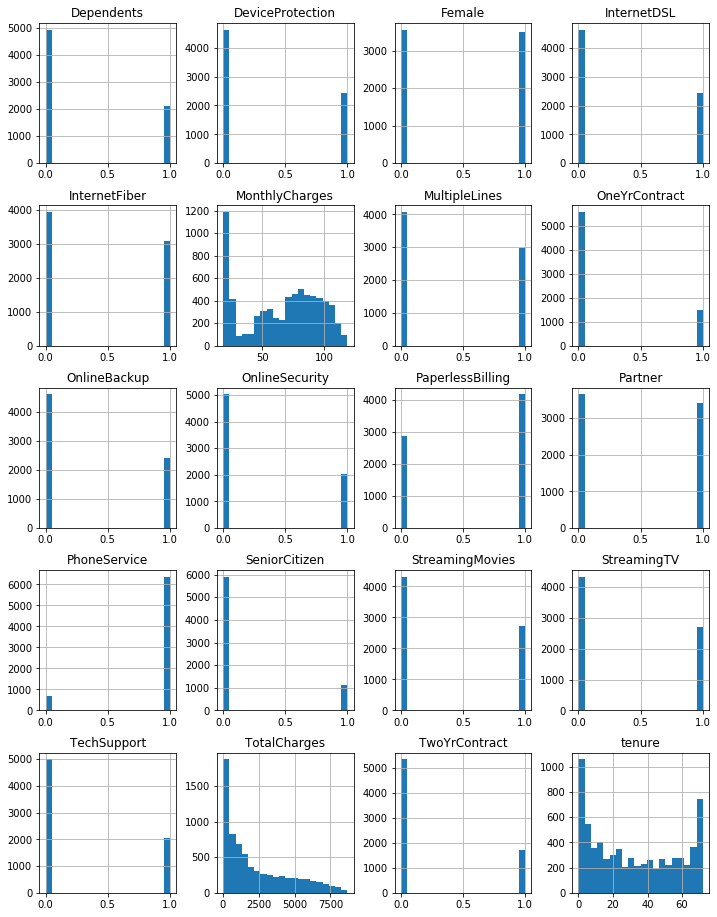

In [115]:
x.hist(bins = 20 , figsize= (12,16));

Text(0.5, 1, 'Variable Correlation')

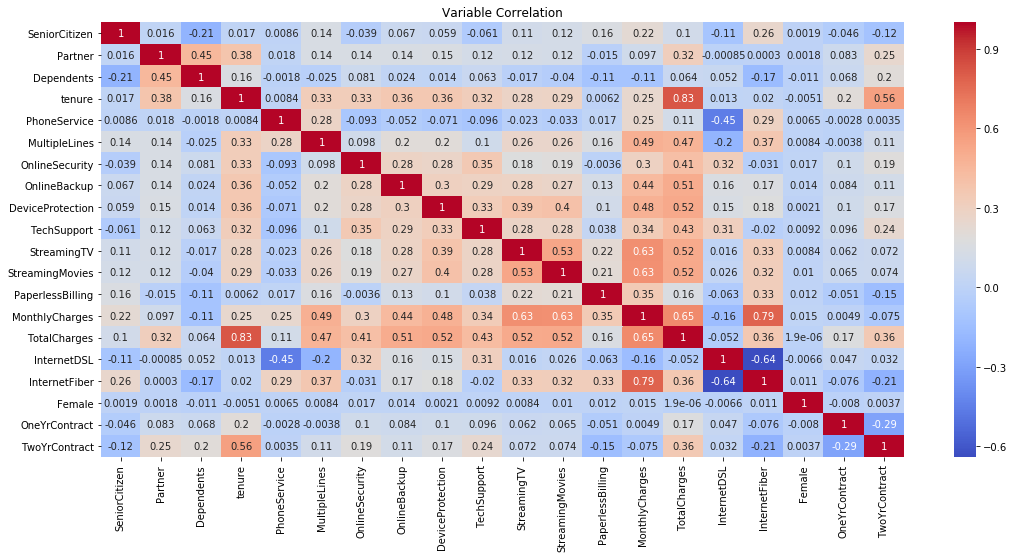

In [116]:
plt.figure(figsize=(18,8))
sns.heatmap(x.corr(),cmap = 'coolwarm', annot=True)
plt.title('Variable Correlation')

In [117]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int32
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
InternetDSL         7043 non-null int32
InternetFiber       7043 non-null int32
Female              7043 non-null int32
OneYrContract       7043 non-null int32
TwoYrContract       7043 non-null int32
dtypes: float64(2), int32(6), int64(12)
memory usage: 935.5 KB


In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = pd.DataFrame(scaler.fit_transform(x))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=123)

In [122]:
linear_svc = svm.SVC(kernel='linear')
val_mse = []
train_mse = []
kf = KFold(n_splits=10)
for train_index, val_index in kf.split(X_train):
    linear_svc.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = linear_svc.predict(X_train.iloc[val_index])
    val_mse.append(mean_squared_error(y_train.iloc[val_index], y_pred))
    y_pred = linear_svc.predict(X_train.iloc[train_index])
    train_mse.append(mean_squared_error(y_train.iloc[train_index], y_pred))
sum(val_mse)/len(val_mse)

0.19898580121703852

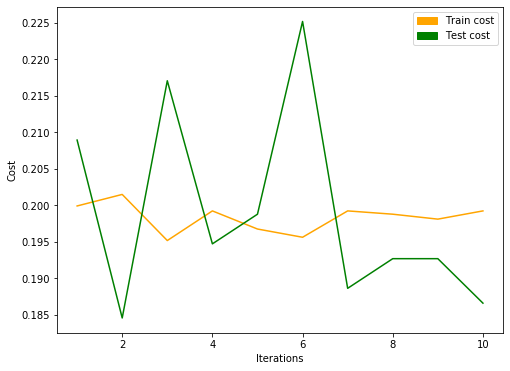

In [123]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
x_iterations = range(1,11)
plt.plot(x_iterations, train_mse, color = "orange") 
plt.plot(x_iterations, val_mse, color = "green") 
plt.xlabel("Iterations") 
plt.ylabel("Cost")
trainlegend = mpatches.Patch(color='orange', label='Train cost')
testlegend = mpatches.Patch(color='green', label='Test cost')
plt.legend([trainlegend, testlegend], ['Train cost', 'Test cost'])
plt.show() 

In [120]:
sigmoid_svc = svm.SVC(kernel='sigmoid', gamma = 'auto')
sig_val_mse = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    sigmoid_svc.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = sigmoid_svc.predict(X_train.iloc[val_index])
    sig_val_mse.append(mean_squared_error(y_train.iloc[val_index], y_pred))
sum(sig_val_mse)/len(sig_val_mse)

0.2002028397565923

In [121]:
rbf_svc = svm.SVC(kernel='rbf', gamma = 'auto')
rbf_val_mse = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    rbf_svc.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    y_pred = rbf_svc.predict(X_train.iloc[val_index])
    rbf_val_mse.append(mean_squared_error(y_train.iloc[val_index], y_pred))
sum(rbf_val_mse)/len(rbf_val_mse)

0.2008113590263692

In [125]:
from sklearn.tree import DecisionTreeClassifier
depth_list=[2,6,12,18,22,None]
train_mse = []
test_mse = []
for i in depth_list:
    dtree = DecisionTreeClassifier(max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_pred))
    y_pred = dtree.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_pred))

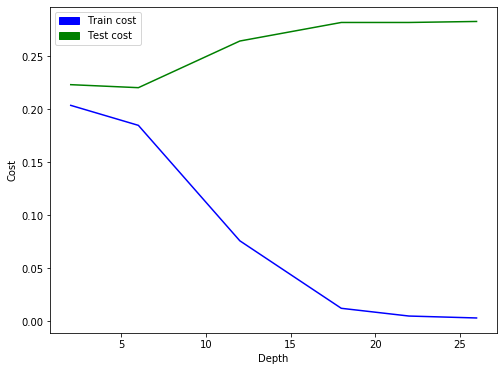

In [128]:
depth_list[-1] = dtree.get_depth()
plt.figure(figsize=(8,6))
plt.plot(depth_list, train_mse, color = "blue") 
plt.plot(depth_list, test_mse, color = "green") 
plt.xlabel("Depth") 
plt.ylabel("Cost")
trainlegend = mpatches.Patch(color='blue', label='Train cost')
testlegend = mpatches.Patch(color='green', label='Test cost')
plt.legend([trainlegend, testlegend], ['Train cost', 'Test cost'])
plt.show() 

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
depth_list=[2,4,8,12,None]
train_mse = []
test_mse = []
for i in depth_list:
    gbc = GradientBoostingClassifier(learning_rate=1, n_estimators=50,max_depth=i,random_state=None)
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_pred))
    y_pred = gbc.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_pred))

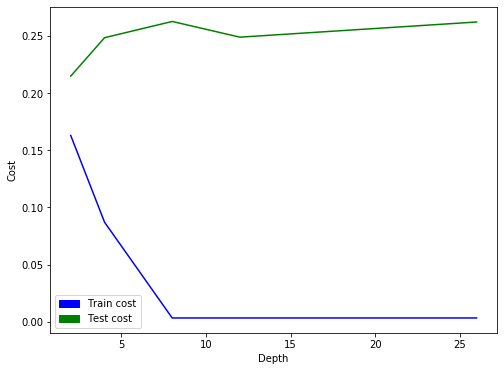

In [132]:
depth_list[-1] = dtree.get_depth()
plt.figure(figsize=(8,6))
plt.plot(depth_list, train_mse, color = "blue") 
plt.plot(depth_list, test_mse, color = "green") 
plt.xlabel("Depth") 
plt.ylabel("Cost")
trainlegend = mpatches.Patch(color='blue', label='Train cost')
testlegend = mpatches.Patch(color='green', label='Test cost')
plt.legend([trainlegend, testlegend], ['Train cost', 'Test cost'])
plt.show() 

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
train_mse = []
test_mse = []
estimators_list=[10,25,50,75,100]
for i in estimators_list:
    gbc = GradientBoostingClassifier(learning_rate=1, n_estimators=i,max_depth=2,random_state=None)
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_pred))
    y_pred = gbc.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_pred))

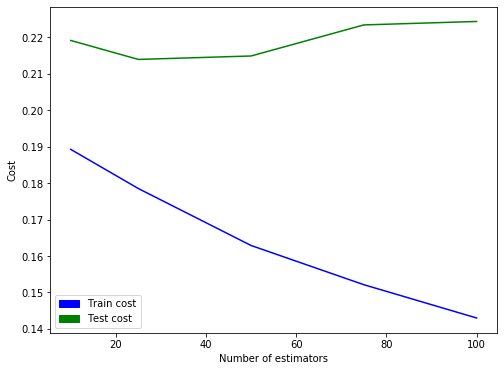

In [136]:
plt.figure(figsize=(8,6))
plt.plot(estimators_list, train_mse, color = "blue") 
plt.plot(estimators_list, test_mse, color = "green") 
plt.xlabel("Number of estimators") 
plt.ylabel("Cost")
trainlegend = mpatches.Patch(color='blue', label='Train cost')
testlegend = mpatches.Patch(color='green', label='Test cost')
plt.legend([trainlegend, testlegend], ['Train cost', 'Test cost'])
plt.show() 

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
learning_list=[0.05,0.1,0.25,0.5,0.75,1]
train_mse = []
test_mse = []
for i in learning_list:
    gbc = GradientBoostingClassifier(learning_rate=i, n_estimators=100,max_depth=2,random_state=None)
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_pred))
    y_pred = gbc.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_pred))

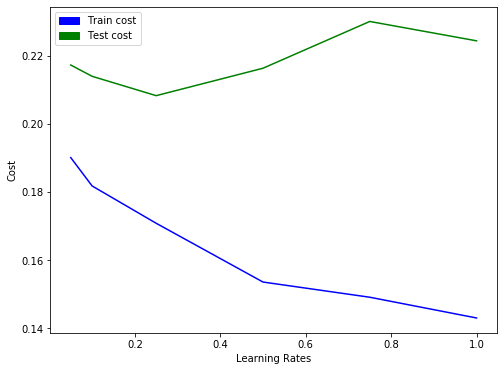

In [138]:
plt.figure(figsize=(8,6))
plt.plot(learning_list, train_mse, color = "blue") 
plt.plot(learning_list, test_mse, color = "green") 
plt.xlabel("Learning Rates") 
plt.ylabel("Cost")
trainlegend = mpatches.Patch(color='blue', label='Train cost')
testlegend = mpatches.Patch(color='green', label='Test cost')
plt.legend([trainlegend, testlegend], ['Train cost', 'Test cost'])
plt.show() 